In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd.read_csv(r"C:\Users\samdc\OneDrive\Desktop\pdf\winedataset\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


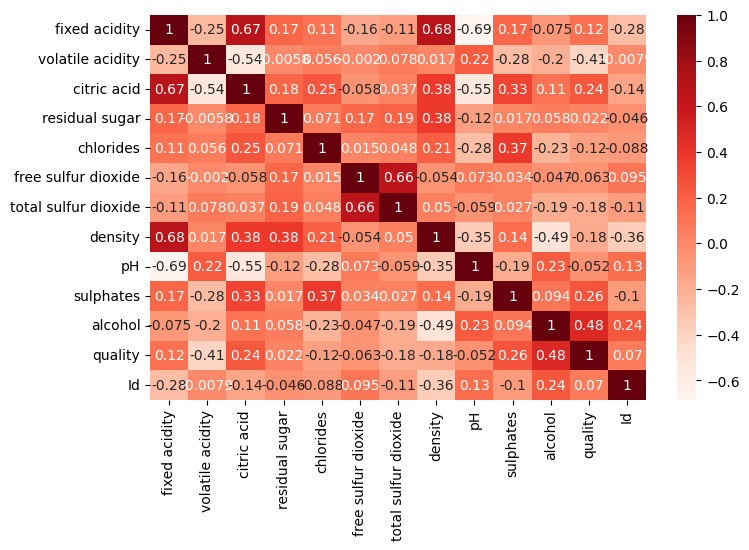

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

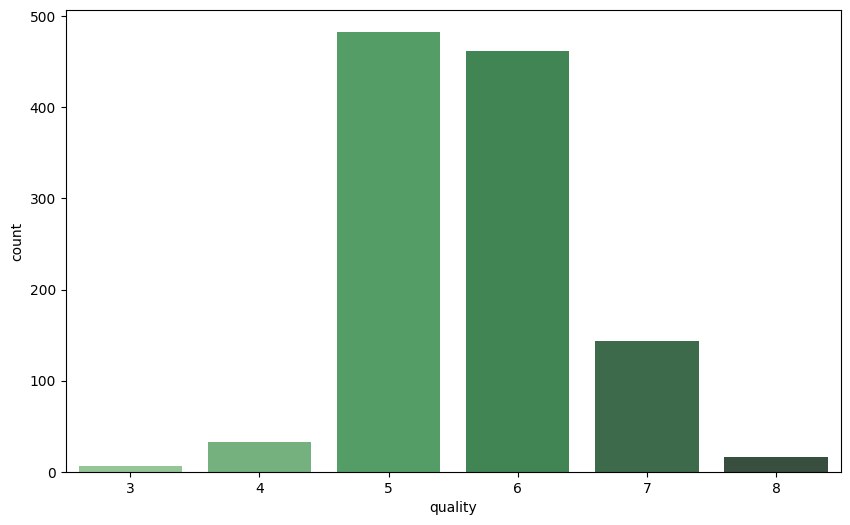

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

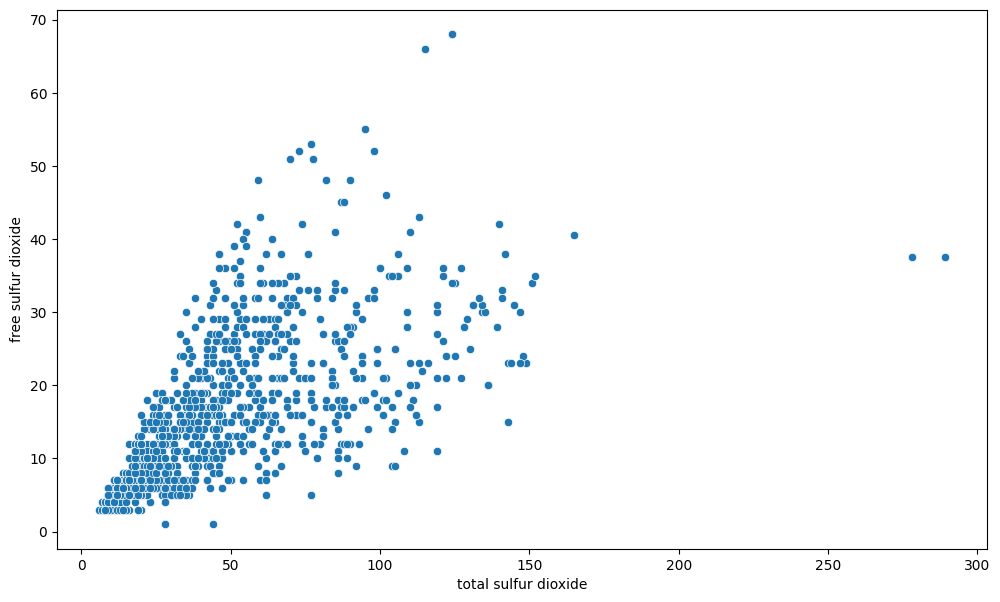

In [13]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

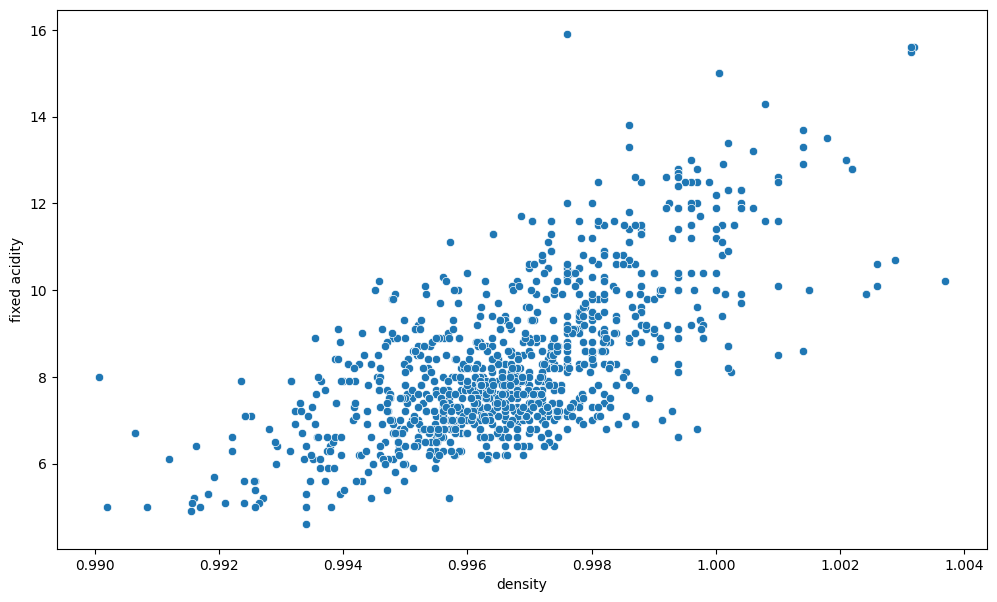

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

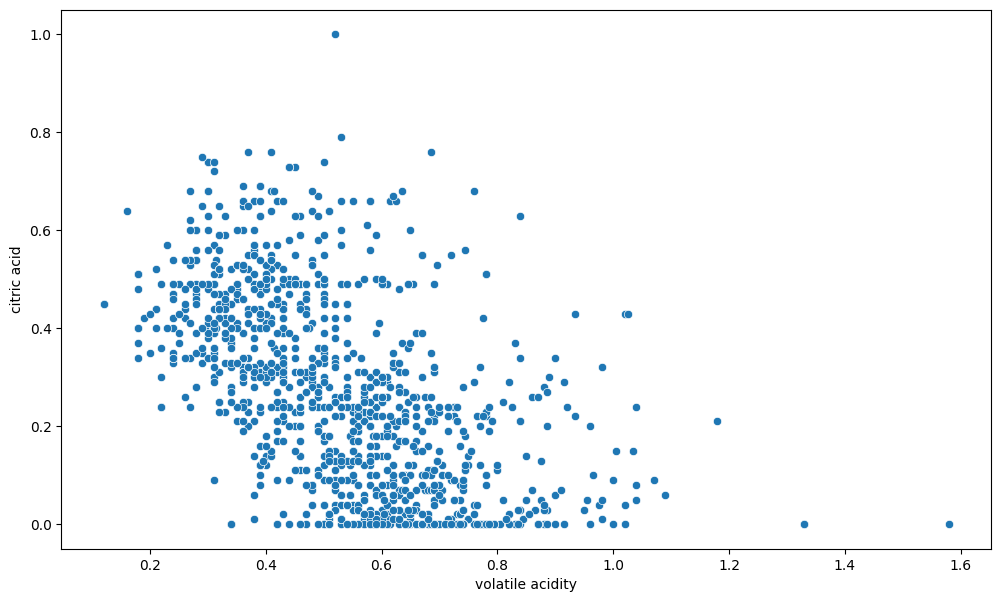

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

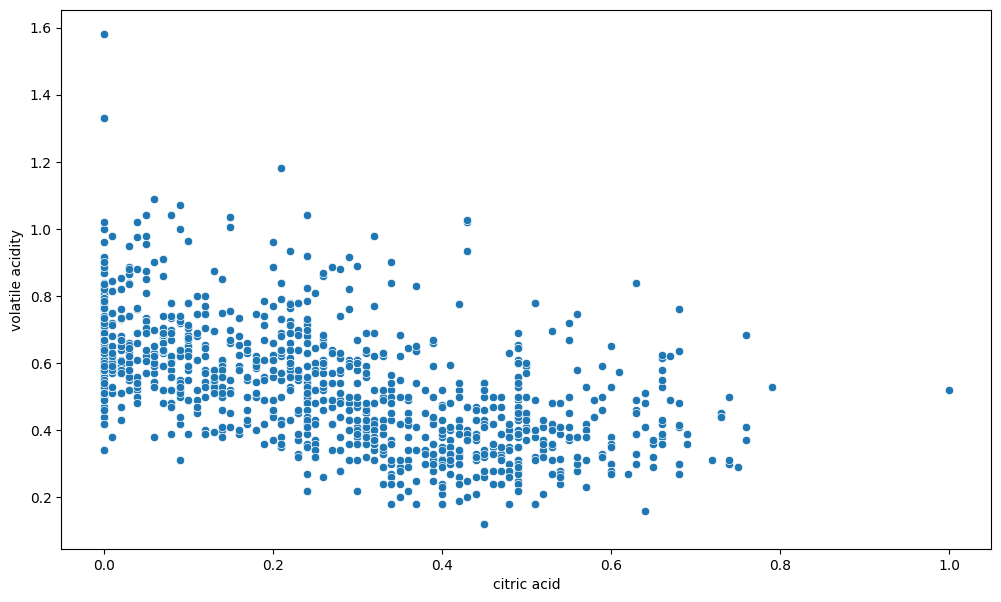

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [23]:

df_binned = df.copy()
for col in df_binned.columns[:-1]:  
    df_binned[col] = pd.qcut(df_binned[col], q=3, labels=["Low", "Medium", "High"])


df_encoded = pd.get_dummies(df_binned).astype(bool)


frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                 antecedents  \
0     (fixed acidity_Medium)   
1                       (Id)   
2                       (Id)   
3       (fixed acidity_High)   
4     (volatile acidity_Low)   
...                      ...   
3773          (density_High)   
3774      (citric acid_High)   
3775    (fixed acidity_High)   
3776                    (Id)   
3777                (pH_Low)   

                                            consequents   support  confidence  \
0                                                  (Id)  0.321085    1.000000   
1                                (fixed acidity_Medium)  0.321085    0.321366   
2                                  (fixed acidity_High)  0.324584    0.324869   
3                                                  (Id)  0.324584    1.000000   
4                                                  (Id)  0.336833    1.000000   
...                                                 ...       ...         ...   
3773  (Id, citric acid_High, pH_Low, fixed acidi

In [25]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

In [27]:
model_comp={}
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.5764192139737991
0.5797610612177639
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.67       100
           6       0.59      0.53      0.56        92
           7       0.50      0.48      0.49        27
           8       1.00      0.50      0.67         2

    accuracy                           0.58       229
   macro avg       0.46      0.37      0.40       229
weighted avg       0.59      0.58      0.58       229



In [56]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.6550218340611353
0.5983266470219287
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.84      0.78       100
           6       0.58      0.72      0.64        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.55      0.66      0.60       229



In [31]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6812227074235808
0.6641100845700859
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.79      0.76       100
           6       0.64      0.68      0.66        92
           7       0.64      0.52      0.57        27
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.33      0.33      0.33       229
weighted avg       0.65      0.68      0.66       229



In [58]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5021834061135371
0.4866528111840211
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.54      0.63      0.58       100
           6       0.45      0.47      0.46        92
           7       0.50      0.33      0.40        27
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro avg       0.25      0.24      0.24       229
weighted avg       0.48      0.50      0.49       229



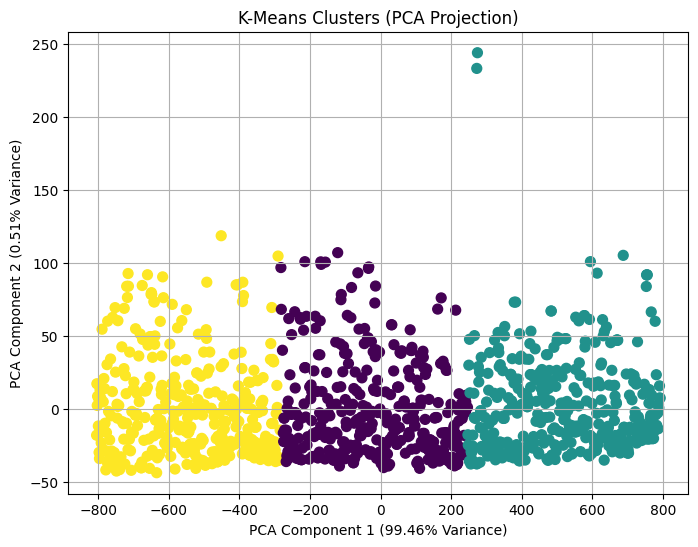

In [35]:

X = df.drop('quality', axis=1)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

X_clustered = X.copy()
X_clustered['KMeans_Cluster'] = kmeans_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel(f"PCA Component 1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA Component 2 ({explained_variance[1]*100:.2f}% Variance)")
plt.grid(True)
plt.show()

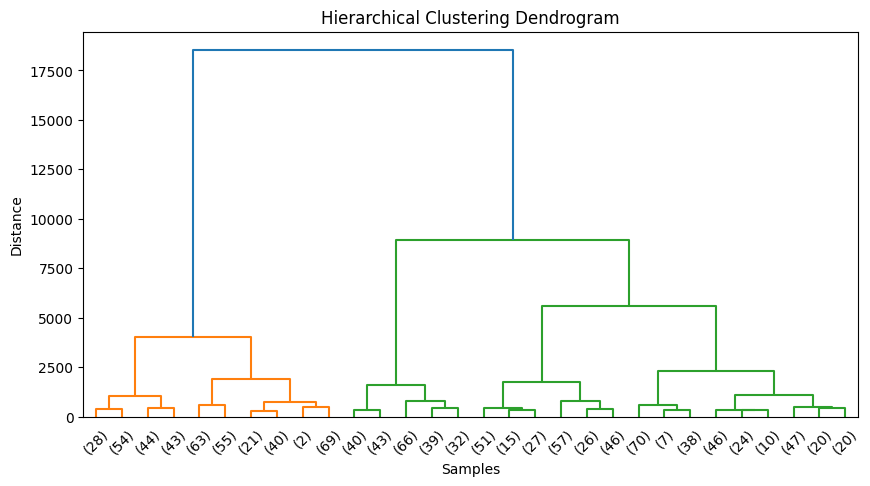

Hierarchical Clustering Done.


In [37]:

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Dendrogram for Hierarchical Clustering
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
X_clustered['Hierarchical_Cluster'] = agglo_labels
print("Hierarchical Clustering Done.")


DBSCAN Clustering Done. Noise points: 1143


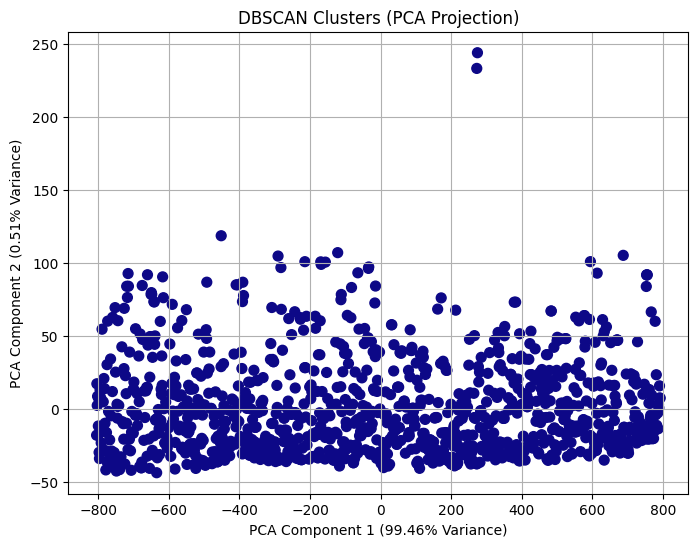

In [39]:


# Prepare features by dropping the target label
X = df.drop('quality', axis=1)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Add cluster labels to the dataset
X_clustered = X.copy()
X_clustered['DBSCAN_Cluster'] = dbscan_labels

# Count number of noise points
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN Clustering Done. Noise points: {n_noise}")

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel(f"PCA Component 1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA Component 2 ({explained_variance[1]*100:.2f}% Variance)")
plt.grid(True)
plt.show()

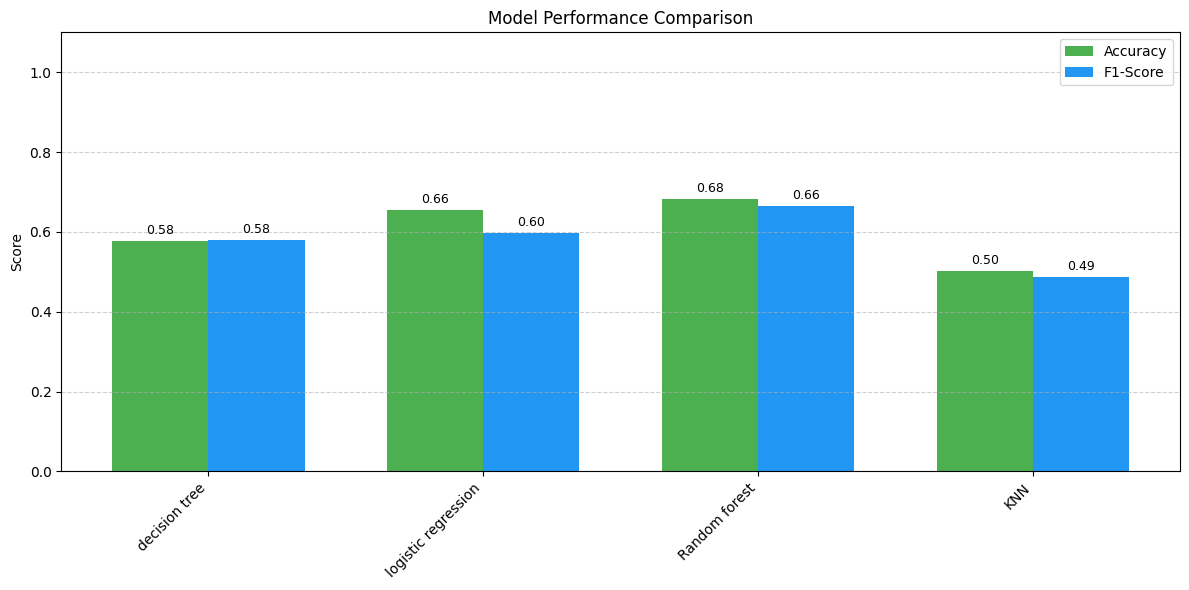

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Get data
models = list(model_comp.keys())
acc = [model_comp[m][0] for m in models]
f1 = [model_comp[m][1] for m in models]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, acc, width=bar_width, label='Accuracy', color='#4CAF50')
bars2 = plt.bar(x + bar_width/2, f1, width=bar_width, label='F1-Score', color='#2196F3')

# Add value labels
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Formatting
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [60]:
comparison_df = df.copy()
comparison_df['KMeans'] = kmeans_labels
comparison_df['Agglomerative'] = agglo_labels
comparison_df['DBSCAN'] = dbscan_labels
comparison_df[['quality', 'KMeans', 'Agglomerative', 'DBSCAN']].head(10)



,quality,KMeans,Agglomerative,DBSCAN
0,5,2,2,-1
1,5,2,2,-1
2,5,2,2,-1
3,6,2,2,-1
4,5,2,2,-1
5,5,2,2,-1
6,5,2,2,-1
7,7,2,2,-1
8,7,2,2,-1
9,5,2,2,-1


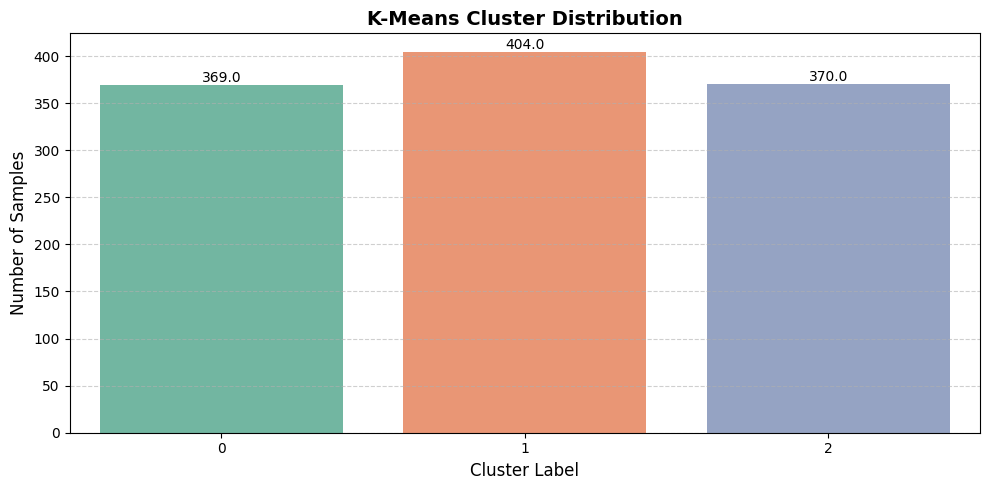

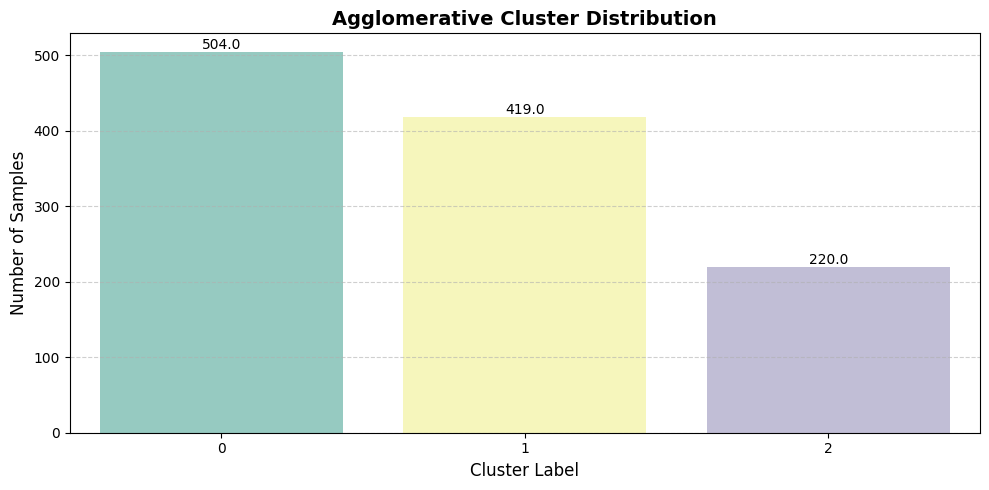

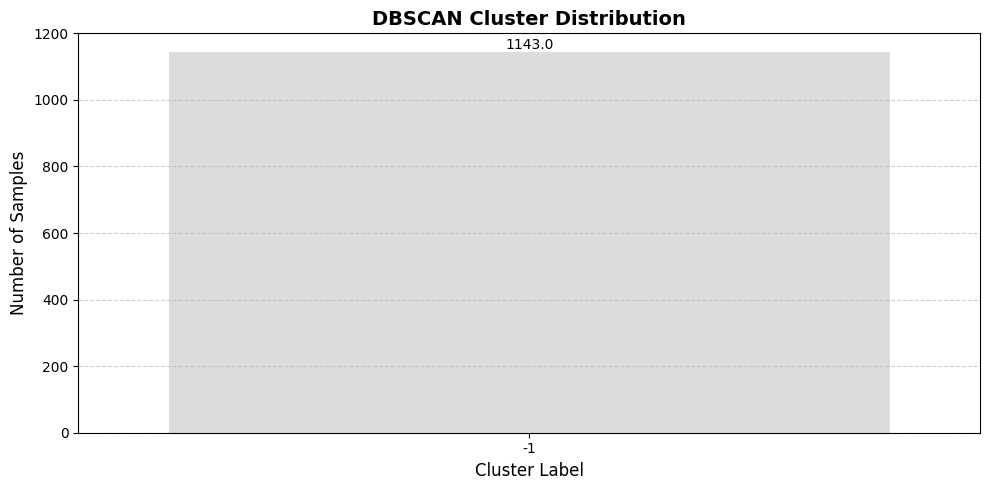

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a helper function to plot cluster distributions
def plot_cluster_distribution(cluster_labels, title, palette):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=cluster_labels, palette=palette)
    
    # Add count labels on each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.title(f"{title} Cluster Distribution", fontsize=14, fontweight='bold')
    plt.xlabel("Cluster Label", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Call function for each clustering method
plot_cluster_distribution(kmeans_labels, "K-Means", palette='Set2')
plot_cluster_distribution(agglo_labels, "Agglomerative", palette='Set3')
plot_cluster_distribution(dbscan_labels, "DBSCAN", palette='coolwarm')
